<a href="https://colab.research.google.com/github/wcrowley342/Spielberg-K-Means-Clustering/blob/main/Spielberg_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading in libraries and data

In [79]:
#import key libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
from sklearn.cluster import KMeans

#import data
movie_data = pd.read_csv("/content/Spielberg Movie Data Final Clean 8.11.csv", encoding='latin-1')  
movie_data.head()


,Title,Release Date,BoxOffice,TomatoMeter,Duration
0,Ready Player One,29-Mar-18,137690172,72,140
1,The Post,22-Dec-17,81903458,88,116
2,The BFG,1-Jul-16,55483770,74,117
3,Bridge of Spies,16-Oct-15,72313754,90,142
4,Lincoln,9-Nov-12,182207973,89,150


In [140]:

testing_github = pd.read_csv('https://raw.githubusercontent.com/wcrowley342/Spielberg-K-Means-Clustering/main/Spielberg%20Movie%20Data%20-%20Cleaned.csv')
testing_github.head()

,Title,Release Date,Box Office,TomatoMeter,Duration
0,Ready Player One,"Mar 29, 2018","137,690,172",72,140
1,The Post,"Dec 22, 2017","81,903,458",88,116
2,The BFG,"Jul 1, 2016","55,483,770",74,117
3,Bridge of Spies,"Oct 16, 2015","72,313,754",90,142
4,Lincoln,"Nov 9, 2012","182,207,973",89,150


# Initial Data Prep and Analysis

In [80]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         31 non-null     object
 1   Release Date  31 non-null     object
 2   BoxOffice     31 non-null     int64 
 3   TomatoMeter   31 non-null     int64 
 4   Duration      31 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.3+ KB


In [81]:
#review dataset
movie_data.describe()

,BoxOffice,TomatoMeter,Duration
count,3.100000e+01,31.000000,31.000000
mean,1.463098e+08,78.451613,134.935484
std,1.061574e+08,16.796505,20.319015
min,2.223870e+07,29.000000,102.000000
25%,7.469386e+07,74.000000,118.000000
50%,1.196548e+08,78.000000,129.000000
75%,2.067534e+08,91.000000,146.000000
max,4.351106e+08,98.000000,195.000000


In [82]:
#plot your data via plotly 

fig = px.scatter(x=movie_data.BoxOffice, y=movie_data.TomatoMeter, color =movie_data.Title)

fig.update_layout(title='Spielberg Films', title_x=0.5, xaxis_title='BoxOffice($)', yaxis_title='TomatoMeter(%)', showlegend=False)

fig.show()

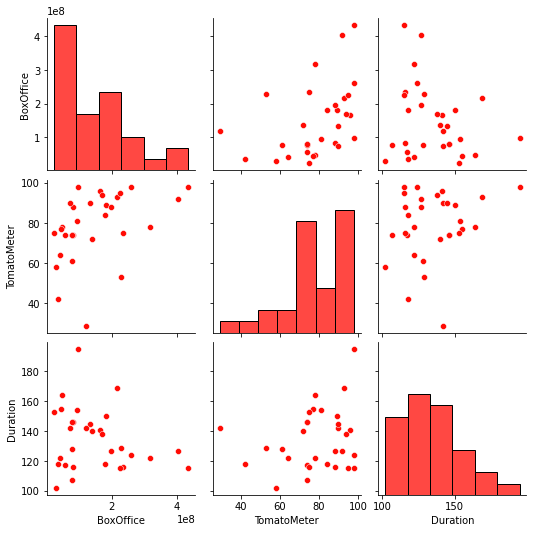

In [83]:
#create a pairplot 

sns.pairplot(movie_data)

In [84]:
#just get the columns of interest for k-means

selected_columns = movie_data[['BoxOffice', 'TomatoMeter']]

new_df = selected_columns
print(new_df)

    BoxOffice  TomatoMeter
0   137690172           72
1    81903458           88
2    55483770           74
3    72313754           90
4   182207973           89
5    79883359           74
6    77591831           74
7   317101119           78
8    47379090           78
9   234280354           75
10   77073959           61
11  164606800           96
12  132024714           90
13   78616689           74
14  216335085           93
15   44212592           77
16  229086679           53
17   96898818           98
18  402523348           92
19  119654823           29
20   41843630           64
21  197171806           88
22   22238696           75
23   94029472           81
24  179880271           84
25   29500000           58
26  435110554           98
27  225686079           95
28   34175000           42
29  169100479           94
30  260000000           98


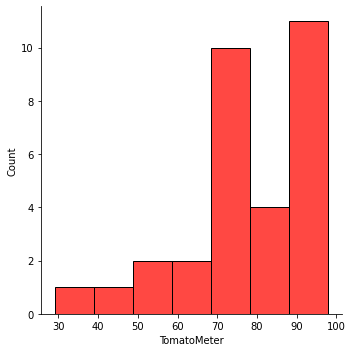

In [85]:
#looking at the skew of our data

sns.displot(new_df['TomatoMeter'])
plt.show()

# Determining number of clusters / elbow method


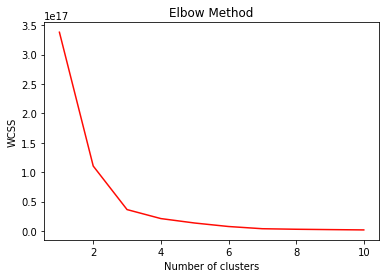

In [86]:
#just get the columns of interest for k-means & elbow method
selected_columns = movie_data[['BoxOffice', 'TomatoMeter']]
new_df = selected_columns

#find the optimial number of clusters using the elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(new_df)
    wcss.append(kmeans.inertia_)

#plot elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Running K Means & Analyzing Clusters

<function matplotlib.pyplot.show>

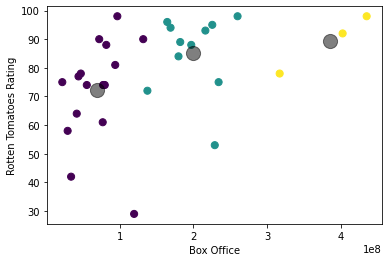

In [124]:
#import package
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_df)
y_clusters = kmeans.predict(new_df)

#plot k-means & visualize the results
plt.scatter(new_df['BoxOffice'], new_df['TomatoMeter'], c=y_clusters, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel("Box Office")
plt.ylabel("Rotten Tomatoes Rating")
plt.legend
plt.show


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



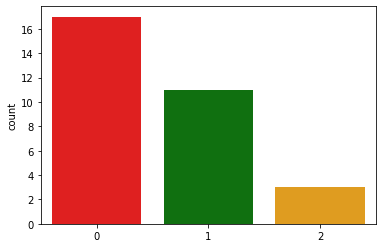

In [125]:
#set a customized color palette
customized_palette = ["red", "green", "orange"]
sns.set_palette(customized_palette)

# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

imbalanced clusters can indicate distant outliers or a group of data points that are quite dissimilar, which could warrrant further investigration

Summary statistics for each cluster 

In [136]:
#reassign a cluster to each row in intial dataset 

movie_data_2 = movie_data.assign(Cluster = y_clusters)

movie_data_2.head()


,Title,Release Date,BoxOffice,TomatoMeter,Duration,Cluster
0,Ready Player One,29-Mar-18,137690172,72,140,1
1,The Post,22-Dec-17,81903458,88,116,0
2,The BFG,1-Jul-16,55483770,74,117,0
3,Bridge of Spies,16-Oct-15,72313754,90,142,0
4,Lincoln,9-Nov-12,182207973,89,150,1


In [137]:
cluster_avg = movie_data_2.groupby(['Cluster']).mean()

print(cluster_avg)

            BoxOffice  TomatoMeter    Duration
Cluster                                       
0        6.969551e+07    72.176471  138.352941
1        1.996405e+08    85.181818  133.363636
2        3.849117e+08    89.333333  121.333333


**Snake Plot**

In [128]:
snake_plot_columns = movie_data_2[['BoxOffice', 'TomatoMeter', 'Duration', 'Cluster']]
movie_data_3 = snake_plot_columns

In [129]:
#normalize data

def normalize(movie_data_3):
    dataNorm=((movie_data_3-movie_data_3.min())/(movie_data_3.max()-movie_data_3.min()))
    dataNorm["Cluster"]=movie_data_3["Cluster"]
    return dataNorm

In [130]:
movie_data_3_normalized=normalize(movie_data_3)

In [131]:
print(movie_data_3_normalized)

    BoxOffice  TomatoMeter  Duration  Cluster
0    0.279630     0.623188  0.408602        1
1    0.144512     0.855072  0.150538        0
2    0.080522     0.652174  0.161290        0
3    0.121285     0.884058  0.430108        0
4    0.387455     0.869565  0.516129        1
5    0.139619     0.652174  0.473118        0
6    0.134069     0.652174  0.053763        0
7    0.714174     0.710145  0.215054        2
8    0.060892     0.710145  0.666667        0
9    0.513577     0.666667  0.150538        1
10   0.132814     0.463768  0.279570        0
11   0.344824     0.971014  0.419355        1
12   0.265908     0.884058  0.462366        0
13   0.136551     0.652174  0.473118        0
14   0.470113     0.927536  0.720430        1
15   0.053222     0.695652  0.569892        0
16   0.500998     0.347826  0.290323        1
17   0.180831     1.000000  1.000000        0
18   0.921072     0.913043  0.268817        2
19   0.235948     0.000000  0.430108        0
20   0.047484     0.507246  0.2150

In [132]:
movie_data_3_normalized_melt = pd.melt(movie_data_3_normalized.reset_index(),
                                       id_vars=['Cluster'],
                                       value_vars=['BoxOffice', 'TomatoMeter', 'Duration'],
                                       var_name='Attribute',
                                       value_name='Value')

In [133]:
#transform data
import numpy as np

movie_data_3_log = np.log(movie_data_3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(movie_data_3_log)

movie_data_3_normalized = scaler.transform(movie_data_3_log)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log



ValueError: ignored

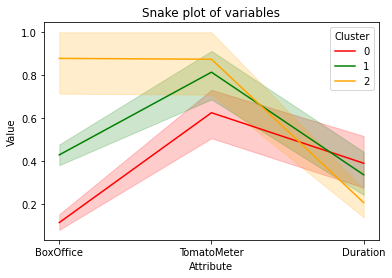

In [138]:

plt.title('Snake plot of variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=movie_data_3_normalized_melt, palette=customized_palette)



/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning:

legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.



Text(0.5, 1.0, 'K Means Cluster of Spielberg Films')

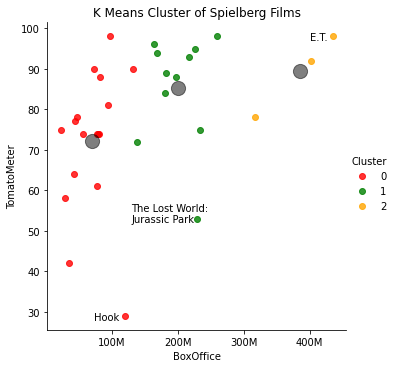

In [135]:
facet = sns.lmplot(data=movie_data_3, x='BoxOffice', y='TomatoMeter', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True, palette=customized_palette)

facet.set_xticklabels(['0','100M', '200M', '300M', '400M'])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#add text annotations 
plt.text(400100554, 97, "E.T.", size='medium', color='black')
plt.text(73154823, 28, "Hook", size='medium', color='black')
plt.text(129086679, 52, "The Lost World:\nJurassic Park", size='medium', color='black')
plt.title("K Means Cluster of Spielberg Films")


# Next Steps & Future Analysis

**3D Clustering**

In [ ]:
#3D scatterplot with plotly

Scene = dict(xaxis = dict(title  = 'Age -->'),yaxis = dict(title  = 'Spending Score--->'),zaxis = dict(title  = 'Annual Income-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = kmeans.labels_
trace = Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig.show()

NameError: ignored

In [ ]:
#3d clustering
#https://plotly.com/python/v3/3d-point-clustering/

scatter = dict(
    mode = "markers",
    name = "y",
    type = "scatter3d",
    x = movie_data['BoxOffice'], y = movie_data['TomatoMeter'], z = movie_data['Duration'],
    marker = dict( size=2, color="rgb(23, 190, 207)" )
)
clusters = dict(
    alphahull = 7,
    name = "y",
    opacity = 0.1,
    type = "mesh3d",
    x = movie_data['BoxOffice'], y = movie_data['TomatoMeter'], z = movie_data['Duration']
)
layout = dict(
    title = '3d point clustering',
    scene = dict(
        xaxis = dict( zeroline=False ),
        yaxis = dict( zeroline=False ),
        zaxis = dict( zeroline=False ),
    )
)
fig = dict( data=[scatter, clusters], layout=layout )
# Use py.iplot() for IPython notebook
py.iplot(fig, filename='3d point clustering')

AttributeError: ignored

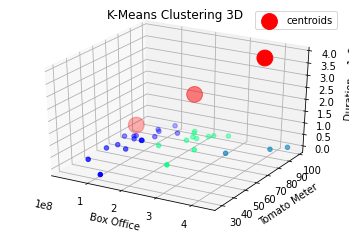

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kmeans.cluster_centers_[:, 0],
                     kmeans.cluster_centers_[:,1],
                     kmeans.cluster_centers_[:,0],
                     s=250,
                     marker='o',
                     c='red',
                     label='centroids')
scatter = ax.scatter(movie_data['BoxOffice'],movie_data['TomatoMeter'], movie_data['Duration'],
                     c=y_clusters,s=20, cmap='winter')


ax.set_title('K-Means Clustering 3D')
ax.set_xlabel('Box Office')
ax.set_ylabel('Tomato Meter')
ax.set_zlabel('Duration')
ax.legend()
plt.show()

# Data Sources

**Data sources used to create dataset**



*   [IMDB Dataset on Kaggle](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+movies.csv)
*   [Rotten Tomatoes Rankings](https://www.rottentomatoes.com/celebrity/steve_spielberg)
*   [Box Office data from The Numbers](https://www.the-numbers.com/person/135430401-Steven-Spielberg#tab=technical)





# Helpful K-Means Tutorials & Resources

*   [Ben Alex Keen - K-Means Clustering in Python](https://benalexkeen.com/k-means-clustering-in-python/)
*   [Amanda Dobbyn - Beer-in-Hand Data Science](https://github.com/aedobbyn/beer-data-science/blob/master/compile/compile.md) 
*   [K-Means Clustering in Python: A Practical Guide](https://realpython.com/k-means-clustering-python/)
*   [Variance Explained - K-Means clustering is not a free lunch](http://varianceexplained.org/r/kmeans-free-lunch/)
*   [Oracle AI & Data Science Blog - Introduction to K-Means Clustering](https://blogs.oracle.com/ai-and-datascience/post/introduction-to-k-means-clustering)






